### Questions
* importing from a .py file into the notebook or anywhere else
* explain the purpose of an ide and jupyter
* set it up so it runs from one to the other (workflow)


### Objectives
YWBAT (You will be able to)
* explain when to use inheritance in OOP structured programming
* create child classes that inherit the attributes of a parent class
* build a child class that is specific to a use case

### What did we learn?
* if __name__ = main allows you to test code in vscode
* Learned that using the Parent attribute in the Child class instantiates everything in the Parent class for the child class
* better idea of what vars does
* I learned about imports so I don’t have to constantly update my kernal
* I learned that it’s better not to restart the kernel all the time
* 

### Scenario
Now that we are able to build a class to better query our database let's extend it using child classes.  The reason for this is that each table has different inputs and structures that must be taken into consideration. We want to build classes that are specific to each table.

In [103]:
from importlib import reload

import sqlite3

import sql_connector as sc # alias the custom .py file i made
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
reload(sc) # this is reloading the custom file

<module 'sql_connector' from '/Users/rafael/flatiron_dsc/curriculum/section07/mod1-section07-oop01-lesson/sql_connector.py'>

In [89]:
conn = sc.SQLConnector(filename="data.sqlite")

In [90]:
conn.tables

['orderdetails',
 'payments',
 'offices',
 'customers',
 'orders',
 'productlines',
 'products',
 'employees']

In [91]:
products = sc.ProductsConn("data.sqlite")

In [92]:
products.get_quantity_of_product(product_code="S24_1937")

7332

(<matplotlib.figure.Figure at 0x10ba21710>,
 <matplotlib.figure.Figure at 0x10ad660b8>)

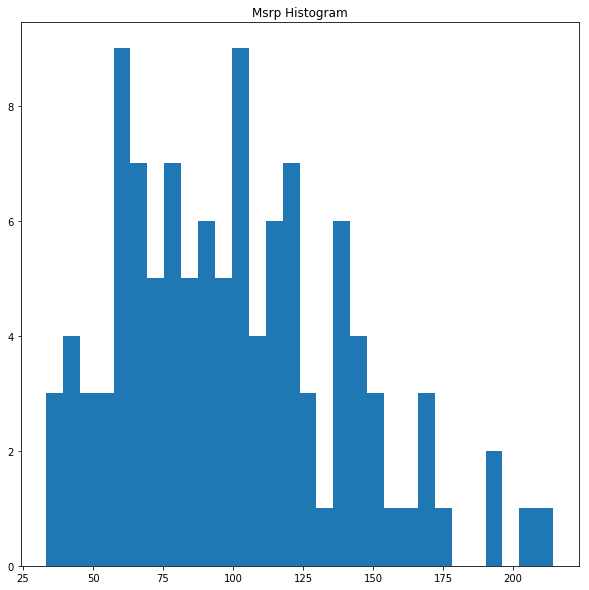

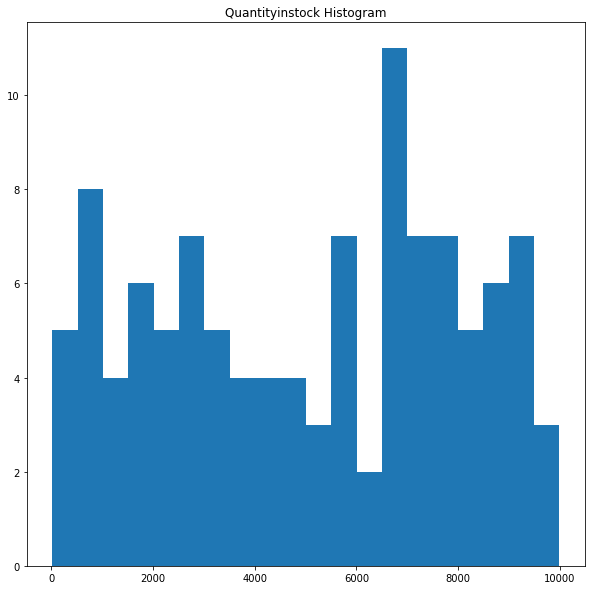

In [93]:
products.plot_histogram("MSRP", bins=30), products.plot_histogram("quantityInStock")

In [50]:
df_products = products.load_products_dataframe()

In [52]:
products.sort_table(df_products, 'MSRP')

,productCode,productName,productLine,productScale,productVendor,productDescription,quantityInStock,buyPrice,MSRP
60,S24_1937,1939 Chevrolet Deluxe Coupe,Vintage Cars,1:24,Motor City Art Classics,This 1:24 scale die-cast replica of the 1939 C...,7332,22.57,33.19
67,S24_2840,1958 Chevy Corvette Limited Edition,Classic Cars,1:24,Carousel DieCast Legends,The operating parts of this 1958 Chevy Corvett...,2542,15.91,35.36
70,S24_2972,1982 Lamborghini Diablo,Classic Cars,1:24,Second Gear Diecast,"This replica features opening doors, superb de...",7723,16.24,37.76
86,S32_2206,1982 Ducati 996 R,Motorcycles,1:32,Gearbox Collectibles,"Features rotating wheels , working kick stand....",9241,24.14,40.23
79,S24_3969,1936 Mercedes Benz 500k Roadster,Vintage Cars,1:24,Red Start Diecast,This model features grille-mounted chrome horn...,2081,21.75,41.03
92,S50_1341,1930 Buick Marquette Phaeton,Vintage Cars,1:50,Studio M Art Models,"Features opening trunk, working steering system",7062,27.06,43.64
63,S24_2022,1938 Cadillac V-16 Presidential Limousine,Vintage Cars,1:24,Classic Metal Creations,This 1:24 scale precision die cast replica of ...,2847,20.61,44.80
108,S72_1253,Boeing X-32A JSF,Planes,1:72,Motor City Art Classics,"10"" Wingspan with retractable landing gears.Co...",4857,32.77,49.66
52,S18_4668,1939 Cadillac Limousine,Vintage Cars,1:18,Studio M Art Models,Features completely detailed interior includin...,6645,23.14,50.31
58,S24_1628,1966 Shelby Cobra 427 S/C,Classic Cars,1:24,Carousel DieCast Legends,This diecast model of the 1966 Shelby Cobra 42...,8197,29.18,50.31


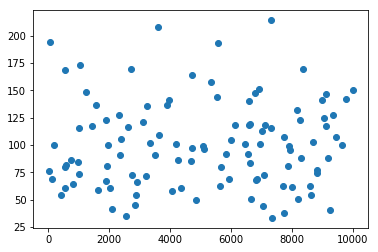

In [96]:
plt.scatter(df_products.quantityInStock, df_products.MSRP)

In [35]:
# experimenting with methods to clean our dataframe to later put in our child class
df_products["quantityInStock"] = df_products.quantityInStock.astype(int)
df_products["MSRP"] = df_products.MSRP.astype(float)
df_products["buyPrice"] = df_products.buyPrice.astype(float)

df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 9 columns):
productCode           110 non-null object
productName           110 non-null object
productLine           110 non-null object
productScale          110 non-null object
productVendor         110 non-null object
productDescription    110 non-null object
quantityInStock       110 non-null int64
buyPrice              110 non-null float64
MSRP                  110 non-null float64
dtypes: float64(2), int64(1), object(6)
memory usage: 7.8+ KB


In [46]:
df_products.head()

,productCode,productName,productLine,productScale,productVendor,productDescription,quantityInStock,buyPrice,MSRP
0,S10_1678,1969 Harley Davidson Ultimate Chopper,Motorcycles,1:10,Min Lin Diecast,"This replica features working kickstand, front...",7933,48.81,95.70
1,S10_1949,1952 Alpine Renault 1300,Classic Cars,1:10,Classic Metal Creations,Turnable front wheels; steering function; deta...,7305,98.58,214.30
2,S10_2016,1996 Moto Guzzi 1100i,Motorcycles,1:10,Highway 66 Mini Classics,"Official Moto Guzzi logos and insignias, saddl...",6625,68.99,118.94
3,S10_4698,2003 Harley-Davidson Eagle Drag Bike,Motorcycles,1:10,Red Start Diecast,"Model features, official Harley Davidson logos...",5582,91.02,193.66
4,S10_4757,1972 Alfa Romeo GTA,Classic Cars,1:10,Motor City Art Classics,Features include: Turnable front wheels; steer...,3252,85.68,136.00


In [47]:
df_products.sort_values(by='quantityInStock')

,productCode,productName,productLine,productScale,productVendor,productDescription,quantityInStock,buyPrice,MSRP
61,S24_2000,1960 BSA Gold Star DBD34,Motorcycles,1:24,Highway 66 Mini Classics,Detailed scale replica with working suspension...,15,37.32,76.17
6,S12_1099,1968 Ford Mustang,Classic Cars,1:12,Autoart Studio Design,"Hood, doors and trunk all open to reveal highl...",68,95.34,194.57
90,S32_4289,1928 Ford Phaeton Deluxe,Vintage Cars,1:32,Highway 66 Mini Classics,This model features grille-mounted chrome horn...,136,33.02,68.79
85,S32_1374,1997 BMW F650 ST,Motorcycles,1:32,Exoto Designs,Features official die-struck logos and baked e...,178,66.92,99.89
109,S72_3212,Pont Yacht,Ships,1:72,Unimax Art Galleries,Measures 38 inches Long x 33 3/4 inches High. ...,414,33.30,54.60
26,S18_2248,1911 Ford Town Car,Vintage Cars,1:18,Motor City Art Classics,"Features opening hood, opening doors, opening ...",540,33.30,60.54
32,S18_2795,1928 Mercedes-Benz SSK,Vintage Cars,1:18,Gearbox Collectibles,This 1:18 replica features grille-mounted chro...,548,72.56,168.75
104,S700_3167,F/A 18 Hornet 1/72,Planes,1:72,Motor City Art Classics,"10"" Wingspan with retractable landing gears.Co...",551,54.40,80.00
95,S50_4713,2002 Yamaha YZR M1,Motorcycles,1:50,Autoart Studio Design,"Features rotating wheels , working kick stand....",600,34.17,81.36
98,S700_1938,The Mayflower,Ships,1:700,Studio M Art Models,Measures 31 1/2 inches Long x 25 1/2 inches Hi...,737,43.30,86.61


In [98]:
connection = sqlite3.Connection("data.sqlite")
cursor = connection.cursor()

In [99]:
conn.tables

['orderdetails',
 'payments',
 'offices',
 'customers',
 'orders',
 'productlines',
 'products',
 'employees']

In [ ]:
def join_tables(columns_dict, join_on_column=None):
    

In [ ]:
columns_dict = {"table1":[column_list], "table2":[column_list]}

array([ 7, 28, 43, 82, 47, 37,  9, 68, 65, 99, 89, 29, 72, 82, 81, 56, 31,
       57, 28, 53])

(20,)